In [1]:
import numpy as np
import tensorflow as tf

import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append(r'D:\Users\Madhouse\tensorflow\yobiface\src')
import utils

import os
from os.path import join as pjoin
import sys
import copy
import shutil
import pickle

print(tf.__version__)

d:\Users\Madhouse\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.7.0


In [14]:
def load_all_pics(path):
    data = {}
    pics_ctr = 0
    files= os.listdir(path)
    for file in files: #遍历文件夹 
        if not os.path.isdir(file): #判断是否是文件夹，不是文件夹才打开
        #print(file)
            person_dir = pjoin(path, file)
            if(file.find(".jpg") > 0):
                guy=file.split("/")[-1][:-4]
                #print("guy[%d]=%s"%(pics_ctr,guy))
                curr_pics = [utils.preproc(cv2.imread(person_dir))]
                data[guy] = curr_pics
                pics_ctr += len(curr_pics)
    return data, pics_ctr

def load_emb_dict(path):
    pickle_file = open(path, 'rb')
    my_dict = pickle.load(pickle_file)
    # 一定要注意 要写关闭文件
    pickle_file.close()
    print("read dict from file is finished")
    return my_dict

def predict(curr_emb, emb_dict):
    min_dist = sys.maxsize
    res="Unknown"
    for g in emb_dict.keys():
        dist = np.linalg.norm(emb_dict[g] - curr_emb)
        if min_dist > dist:
            min_dist = dist
            closest_guy = g
        #print('%s\t: %.2f' % (g,dist))
    print('%s\t: %.2f' % (closest_guy,min_dist))
    if min_dist <= 1.15:
        res=closest_guy
        #print("I think, the pic belongs to %s." % closest_guy)
    #else:
        #print("I don't know this guy....")
    return res

In [3]:
tf.reset_default_graph()
sess = tf.Session()
saver = tf.train.import_meta_graph(r'D:\Users\Madhouse\tensorflow\download\20180402-114759\model-20180402-114759.meta')
saver.restore(sess, r'D:\Users\Madhouse\tensorflow\download\20180402-114759\model-20180402-114759.ckpt-275')
images_placeholder = tf.get_default_graph().get_tensor_by_name("input:0")
embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0")
phase_train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")

INFO:tensorflow:Restoring parameters from D:\Users\Madhouse\tensorflow\download\20180402-114759\model-20180402-114759.ckpt-275


In [15]:
DATA_DIR = r'D:\software\lfw1'
data, n_pics = load_all_pics(DATA_DIR)
print('Loaded %d pics.' % n_pics)
emb_dict = load_emb_dict('emb_dict_for_all.pkl')
print('emb_dict length = %d'%len(emb_dict))
test_dict = {}
for p in data:
    test_dict[p] = list(sess.run([embeddings], feed_dict={images_placeholder: np.array(data[p]), phase_train_placeholder: False })[0])
    prediction = predict(test_dict[p], emb_dict)
    print("for %s: the predict result is %s"%(p, prediction))

Loaded 7 pics.
read dict from file is finished
emb_dict length = 5749
Toni_Braxton	: 0.43
for Toni_Braxton_0002: the predict result is Toni_Braxton
Tyra_Banks	: 0.37
for Tyra_Banks_0002: the predict result is Tyra_Banks
Urmila_Matondkar	: 0.00
for Urmila_Matondkar_0001: the predict result is Urmila_Matondkar
Vaclav_Havel	: 0.50
for Vaclav_Havel_0004: the predict result is Vaclav_Havel
Wei_Wu	: 0.00
for Wei_Wu_0001: the predict result is Wei_Wu
Yao_Ming	: 0.50
for Yao_Ming_0004: the predict result is Yao_Ming
Zhang_Ziyi	: 0.49
for Zhang_Ziyi_0003: the predict result is Zhang_Ziyi


In [4]:
import imageio
import tensorflow as tf  
import numpy as np  
import cv2  
import detect_face  
import time 
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#face detection parameters  
minsize = 20 # minimum size of face  
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold  
factor = 0.709 # scale factor 
print('Creating networks and loading parameters')  
#gpu_memory_fraction = 1.0  
with tf.Graph().as_default():  
    #gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_memory_fraction)  
    #sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=False))
    sess = tf.Session() 
    with sess.as_default():  
        pnet, rnet, onet = detect_face.create_mtcnn(sess, './mtcnn_model/')
        saver = tf.train.import_meta_graph(r'D:\Users\Madhouse\tensorflow\download\20180402-114759\model-20180402-114759.meta')
        saver.restore(sess, r'D:\Users\Madhouse\tensorflow\download\20180402-114759\model-20180402-114759.ckpt-275')
        images_placeholder = tf.get_default_graph().get_tensor_by_name("input:0")
        embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0")
        phase_train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")
print("model restore finished.....")

Creating networks and loading parameters
INFO:tensorflow:Restoring parameters from D:\Users\Madhouse\tensorflow\download\20180402-114759\model-20180402-114759.ckpt-275
model restore finished.....


read dict from file is finished
emb_dict length = 12
找到人脸数目为：4
[750 272 854 401] 1.0
maodan	: 0.65
[422 253 512 375] 1.0
hui	: 0.81
[1239  240 1347  380] 1.0
huaqiang	: 0.67
[147 242 322 492] 1.0
pipi	: 1.18


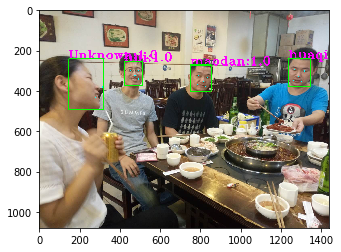

找到人脸数目为：1
[  22  332  567 1011] 1.0
yaoyao	: 0.88


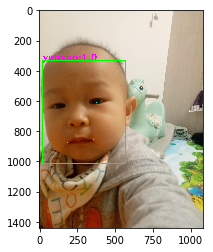

找到人脸数目为：1
[ 90  41 173 147] 1.0
li	: 1.35


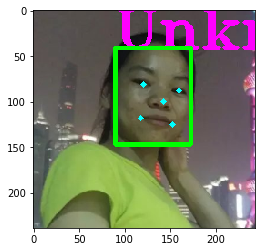

找到人脸数目为：4
[154  44 189  80] 1.0
shaXhu	: 0.99
[42 26 72 65] 1.0
hui	: 1.60
[ 81  42 103  72] 1.0
li	: 1.51
[127  47 152  79] 1.0
yue	: 1.20


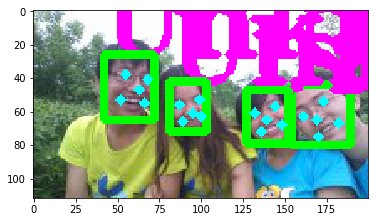

找到人脸数目为：2
[ 273  860  578 1226] 1.0
li	: 1.33
[507 563 834 987] 1.0
shaXhu	: 1.42


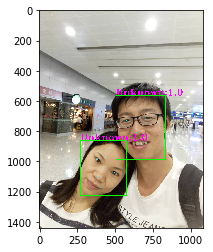

找到人脸数目为：1
[278 344 699 914] 1.0
pipi	: 0.78


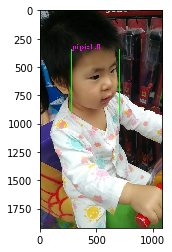

找到人脸数目为：1
[ 192  381  688 1017] 1.0
pipi	: 0.93


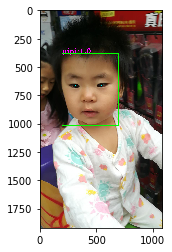

In [25]:
import os 
import imageio
import cv2
from PIL import Image
#path = "C:/Users/Madhouse/" #文件夹目录
path = "D:/software/photos/test"
#path = "D:/software/lfw1"
files= os.listdir(path) #得到文件夹下的所有文件名称

emb_dict = load_emb_dict('emb_dict_for_w.pkl')
print('emb_dict length = %d'%len(emb_dict))


crop_faces=[]
for file in files: #遍历文件夹 
    if not os.path.isdir(file): #判断是否是文件夹，不是文件夹才打开
        #print(file)
        if(file.find(".jpg") > 0):
            #img = imageio.imread(path+'/'+file)
            #img = cv2.imread(path+'/'+file)
            img = Image.open(path+'/'+file)
            if(img.mode=='RGBA'):
                img=img.convert('RGB')
            img = np.array(img)
            bounding_boxes, points = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)  
            nrof_faces = bounding_boxes.shape[0]#人脸数目  
            print('找到人脸数目为：{}'.format(nrof_faces))
            
            for face_position in bounding_boxes:
                score = np.round(face_position[4],2)
                face_position=face_position.astype(int)  
                print(face_position[0:4], score)
                if(face_position[0]<0 or face_position[1]<0):
                    continue
                crop=img[face_position[1]:face_position[3],  
                     face_position[0]:face_position[2],]
                crop = cv2.resize(crop, (160, 160), interpolation=cv2.INTER_CUBIC ) 
                #crop = cv2.resize(crop, (160, 160)) 
                #print(crop.shape)
                test_dict = list(sess.run([embeddings], feed_dict={images_placeholder: np.array([utils.preproc(crop)]), phase_train_placeholder: False })[0])
                #test_dict = list(sess.run([embeddings], feed_dict={images_placeholder: np.array([crop]), phase_train_placeholder: False })[0])
                prediction = predict(np.array(test_dict), emb_dict)
                
                crop_faces.append(crop)
                cv2.putText(img,str(prediction+':'+str(score)),(face_position[0],face_position[1]),cv2.FONT_HERSHEY_TRIPLEX,2,(255,0,255),3)
                cv2.rectangle(img, (face_position[0], face_position[1]), (face_position[2], face_position[3]), (0, 255, 0), 4)
            points = np.transpose(points)
            for point in points:  
                for i in range(5):
                    cv2.circle(img, (point[i], point[i + 5]), 1, (0, 255, 255), 4)
                
            plt.imshow(img)  
            plt.show()